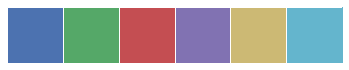

In [454]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))
current_palette = sns.color_palette()
sns.palplot(current_palette)

### Solve the knapsack problem with Tabu search algorithm
#### Problem description
In the knapscak problem, where are _n_ items with values $(v_1,v_2,\ldots,v_n)$ and weigths $(w_1,w_2,\ldots,w_n)$ and the value _W_
specifying the capacity of the knapsack.We would like to maximise
\begin{equation*}
\sum_{j=1}^n v_j x_j
\end{equation*}

where $ x \in \{0,1\}$ and also 
\begin{equation*}
\sum_{i=1}^n w_i \leq W
\end{equation*}


In [127]:
import numpy as np
import random

In [170]:
weigths = np.array([70,73,77,80,82,87,90,94,98,106,110,113,115,118,120])
values = np.array([135,139,149,150,156,163,173,184,192,201,210,214,221,229,240])
total_capacity = 750

array([139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240])

In [121]:
a = np.arange(5)**2
a.shape

(5,)

In [217]:
print len(weigths) == len(values)
np.append(np.array([2]),2)

True


array([2, 2])

Let's make a characteristic function so  we can calculate the total value and weigth usig dot product

In [174]:
def characteristic_function(elements,subset):
    return np.array([1 if x in subset else 0 for x in elements])

def swap(neighbour,knapsack):
    if neighbour not in knapsack:
        return np.append(knapsack,neighbour)
    else:
        return knapsack[ knapsack != neighbour]
        
        


In [162]:
def fitness(penalty,knapsack,weights,values,capacity):
    set_indicator = characteristic_function(weigths,knapsack)
    v = np.dot(set_indicator,values)
    w = np.dot(set_indicator,weights)
    return v - penalty*(max(0,w - capacity))


139

In [422]:
def tabusearch(values,weigths,capacity,max_iterations,penalty_multiplier):
    current_solution = np.zeros(len(weigths))
    tabulist = np.array([])
    knapsack = np.array([])
    best_fitness = 0
    n = 0
    while (n < max_iterations):
        neighbours = np.setdiff1d(weigths,tabulist)
        for neighbour  in neighbours:
            candinate = swap(neighbour,knapsack)
            current_fitness = fitness(penalty_multiplier,candinate,weigths,values,capacity)
            if current_fitness > best_fitness:   
                best_solution = neighbour
                best_fitness = current_fitness
        
        knapsack = swap(best_solution,knapsack)
        n = n +1
        tabulist = np.append(tabulist,best_solution)
        if(len(tabulist) > 5):
            tabulist = tabulist[1:]
        best_fitness  = 0 
    return np.dot(characteristic_function(weigths,knapsack),values) ,np.dot(characteristic_function(weigths,knapsack),weigths),knapsack 
    

In [447]:
max_iterations = 100
data_results = [(penalty,(tabusearch(values,weigths,total_capacity,max_iterations,penalty))) for penalty in np.arange(1,3,step =.1)]

In [456]:
values_p = [row[1][0] for row in data_results]
weights_p = [row[1][1] for row in data_results]
knapscaks_p = [row[1][2] for row in data_results]
penalties = [row[0] for row in data_results]
max_weigth = [750 for row in data_results]

In [438]:
%matplotlib inline
from matplotlib.pyplot import *
import seaborn as sns
sns.set(color_codes=True)

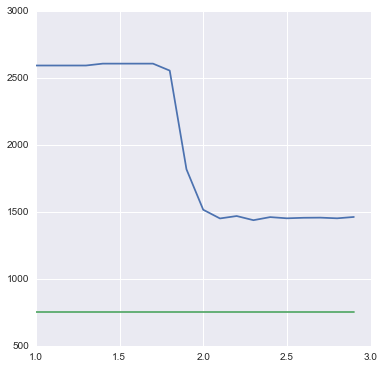

In [457]:
plt.plot(penalties,values_p )


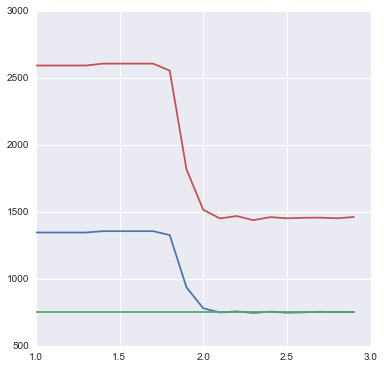

In [459]:
plt.plot(penalties,weights_p )
plt.plot(penalties,max_weigth)
plt.plot(penalties,values_p )

Next we try to find out the maximal value where the total weigth is less than 750.